# Hypothesis: People with higher income have more 311 requests

In [136]:
# import the necessary modules
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# set figure size to 9x5
plt.rcParams['figure.figsize'] = [16, 8]

In [117]:
# load final_df.csv which contains 311 cases and Census data from 2017 and onward
final_df = pd.read_csv('final_df.csv')
final_df

,Unnamed: 0,CaseID,Opened,Category,Request Type,Neighborhood,Latitude,Longitude,Source,Media URL,Opened Date,Opened Year,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,0,10395976,01/23/2019 01:34:53 PM,Sign Repair,Sign - Missing,Mission,37.764091,-122.413002,Web,NaN,01/23/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.928530
1,1,11886797,01/01/2020 09:06:00 PM,General Request - PUBLIC WORKS,request_for_service,Mission,37.764840,-122.415038,Web,NaN,01/01/2020,2020,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.928530
2,2,11089240,07/05/2019 03:12:37 PM,Graffiti,Graffiti on Building_other,Mission,37.755848,-122.414551,Integrated Agency,NaN,07/05/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.928530
3,3,11239390,08/07/2019 01:25:51 PM,Graffiti,Graffiti on Building_other,Mission,37.755703,-122.416397,Integrated Agency,NaN,08/07/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.928530
4,4,11886078,01/01/2020 03:27:00 PM,Street and Sidewalk Cleaning,General Cleaning,Mission,37.769532,-122.415847,Mobile/Open311,http://mobile311.sfgov.org/reports/11886078/ph...,01/01/2020,2020,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.928530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873838,1873838,11445821,09/21/2019 08:53:04 AM,Encampments,Encampment Reports,Presidio National Park,37.806462,-122.450988,Mobile/Open311,http://mobile311.sfgov.org/reports/11445821/ph...,09/21/2019,2019,94129,4019.0,29.4,190167.0,81974.0,122.0,3.035581
1873839,1873839,11451330,09/22/2019 06:16:00 PM,Street Defects,Pavement_Defect,Presidio National Park,37.804123,-122.472125,Mobile/Open311,NaN,09/22/2019,2019,94129,4019.0,29.4,190167.0,81974.0,122.0,3.035581
1873840,1873840,11416625,09/14/2019 05:20:44 PM,Parking Enforcement,Blocking_Bicycle_Lane,Presidio National Park,37.801830,-122.456973,Mobile/Open311,http://mobile311.sfgov.org/reports/11416625/ph...,09/14/2019,2019,94129,4019.0,29.4,190167.0,81974.0,122.0,3.035581
1873841,1873841,11444928,09/20/2019 07:55:37 PM,Noise Report,Noise Issue,Presidio National Park,37.808779,-122.471963,Mobile/Open311,NaN,09/20/2019,2019,94129,4019.0,29.4,190167.0,81974.0,122.0,3.035581


In [118]:
final_df.columns

Index(['Unnamed: 0', 'CaseID', 'Opened', 'Category', 'Request Type',
       'Neighborhood', 'Latitude', 'Longitude', 'Source', 'Media URL',
       'Opened Date', 'Opened Year', 'Zipcode', 'Population', 'Median Age',
       'Household Income', 'Per Capita Income', 'Poverty Count',
       'Poverty Rate'],
      dtype='object')

In [119]:
# drop the Unnamed column
del final_df['Unnamed: 0']
final_df.head()

,CaseID,Opened,Category,Request Type,Neighborhood,Latitude,Longitude,Source,Media URL,Opened Date,Opened Year,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,10395976,01/23/2019 01:34:53 PM,Sign Repair,Sign - Missing,Mission,37.764091,-122.413002,Web,NaN,01/23/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
1,11886797,01/01/2020 09:06:00 PM,General Request - PUBLIC WORKS,request_for_service,Mission,37.764840,-122.415038,Web,NaN,01/01/2020,2020,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
2,11089240,07/05/2019 03:12:37 PM,Graffiti,Graffiti on Building_other,Mission,37.755848,-122.414551,Integrated Agency,NaN,07/05/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
3,11239390,08/07/2019 01:25:51 PM,Graffiti,Graffiti on Building_other,Mission,37.755703,-122.416397,Integrated Agency,NaN,08/07/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
4,11886078,01/01/2020 03:27:00 PM,Street and Sidewalk Cleaning,General Cleaning,Mission,37.769532,-122.415847,Mobile/Open311,http://mobile311.sfgov.org/reports/11886078/ph...,01/01/2020,2020,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853


In [120]:
final_df.count()

CaseID               1873843
Opened               1873843
Category             1873843
Request Type         1873843
Neighborhood         1873843
Latitude             1873843
Longitude            1873843
Source               1873843
Media URL             878835
Opened Date          1873843
Opened Year          1873843
Zipcode              1873843
Population           1873843
Median Age           1873843
Household Income     1873843
Per Capita Income    1873843
Poverty Count        1873843
Poverty Rate         1873843
dtype: int64

In [121]:
groupedby_zipcode = final_df.groupby('Zipcode')
case_count = groupedby_zipcode['CaseID'].count()

byzipcode_df = pd.DataFrame(Case_count)
byzipcode_df.columns = ['Case Count']

household_income = groupedby_zipcode['Zipcode', 'Household Income'].head(1).sort_values(by='Zipcode', ascending=True)
household_income.set_index('Zipcode', inplace=True)
per_capita_income = groupedby_zipcode['Per Capita Income'].mean()
population = groupedby_zipcode['Population'].mean()
neighborhood = groupedby_zipcode['Zipcode','Neighborhood'].head(1).sort_values(by='Zipcode', ascending=True)
neighborhood.set_index('Zipcode', inplace=True)

byzipcode_df['Household Income'] = household_income['Household Income'].astype(int)
byzipcode_df['Per Capita Income'] = per_capita_income.astype(int)
byzipcode_df['Population'] = population.astype(int)
byzipcode_df['Case Count Per 1000 People'] = (byzipcode_df['Case Count'] / byzipcode_df['Population'] * 1000).astype(int)
byzipcode_df['Neighborhood'] = neighborhood['Neighborhood']

byzipcode_df

,Case Count,Household Income,Per Capita Income,Population,Case Count Per 1000 People,Neighborhood
Zipcode,,,,,,
94102,171629,33552,43488,30140,5694,Downtown / Union Square
94103,190955,49052,55807,26990,7075,South of Market
94104,25598,48429,64267,436,58711,Financial District
94105,24142,199364,154723,7675,3145,South Beach
94107,86295,143467,87735,29920,2884,Potrero Hill
94108,30084,55341,51359,14856,2025,Chinatown
94109,132828,79979,75460,56587,2347,Cathedral Hill
94110,283725,109747,59660,73737,3847,Mission
94111,6826,99464,88610,3356,2033,Northern Waterfront


# Service Request by Income Brackets

In [122]:
bins = [0, 35000, 50000, 75000, 100000, 150000, 999999999]
bin_names = ['<$35,000', '\$35,000-\$49,999', '\$50,000-\$74,999', '\$75,000-\$99,999', '\$100,000-\$150,000', '>$150,000']
byzipcode_df['Income Ranges'] = pd.cut(x=byzipcode_df['Per Capita Income'], bins=bins, labels=bin_names, include_lowest=True, right=False)

total_case_count = byzipcode_df['Case Count'].sum()

byzipcode_df['Request %'] = byzipcode_df['Case Count'] / total_case_count

groupby_income_ranges = byzipcode_df.groupby('Income Ranges')
income_range_percentage = (groupby_income_ranges['Request %'].sum() * 100)
income_range_percentage.index, income_range_percentage.values

(CategoricalIndex(['<$35,000', '\$35,000-\$49,999', '\$50,000-\$74,999',
                   '\$75,000-\$99,999', '\$100,000-\$150,000', '>$150,000'],
                  categories=['<$35,000', '\$35,000-\$49,999', '\$50,000-\$74,999', '\$75,000-\$99,999', '\$100,000-\$150,000', '>$150,000'], ordered=True, name='Income Ranges', dtype='category'),
 array([16.24522439,  9.1591985 , 44.67007108, 19.79728291,  8.83985478,
         1.28836834]))

In [123]:
byzipcode_df

,Case Count,Household Income,Per Capita Income,Population,Case Count Per 1000 People,Neighborhood,Income Ranges,Request %
Zipcode,,,,,,,,
94102,171629,33552,43488,30140,5694,Downtown / Union Square,"\$35,000-\$49,999",0.091592
94103,190955,49052,55807,26990,7075,South of Market,"\$50,000-\$74,999",0.101906
94104,25598,48429,64267,436,58711,Financial District,"\$50,000-\$74,999",0.013661
94105,24142,199364,154723,7675,3145,South Beach,">$150,000",0.012884
94107,86295,143467,87735,29920,2884,Potrero Hill,"\$75,000-\$99,999",0.046052
94108,30084,55341,51359,14856,2025,Chinatown,"\$50,000-\$74,999",0.016055
94109,132828,79979,75460,56587,2347,Cathedral Hill,"\$75,000-\$99,999",0.070885
94110,283725,109747,59660,73737,3847,Mission,"\$50,000-\$74,999",0.151413
94111,6826,99464,88610,3356,2033,Northern Waterfront,"\$75,000-\$99,999",0.003643


Income Ranges
<$35,000               16.245224
\$35,000-\$49,999       9.159199
\$50,000-\$74,999      44.670071
\$75,000-\$99,999      19.797283
\$100,000-\$150,000     8.839855
>$150,000               1.288368
Name: Request %, dtype: float64

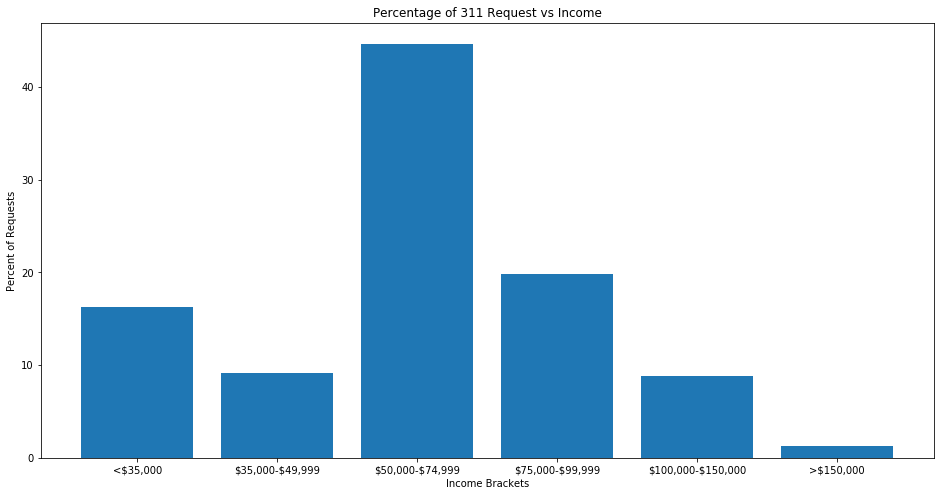

In [131]:
plt.bar(income_range_percentage.index, income_range_percentage.values)
plt.xlabel("Income Brackets")
plt.ylabel("Percent of Requests")
plt.title("Percentage of 311 Request vs Income")
income_range_percentage

The correlation between both factors is -0.14654140312610806
The correlation coefficient (rvalue) is -0.1465414031261081
The pvalue is 0.47501753549941994
The r-squared is: 0.021474382830168528


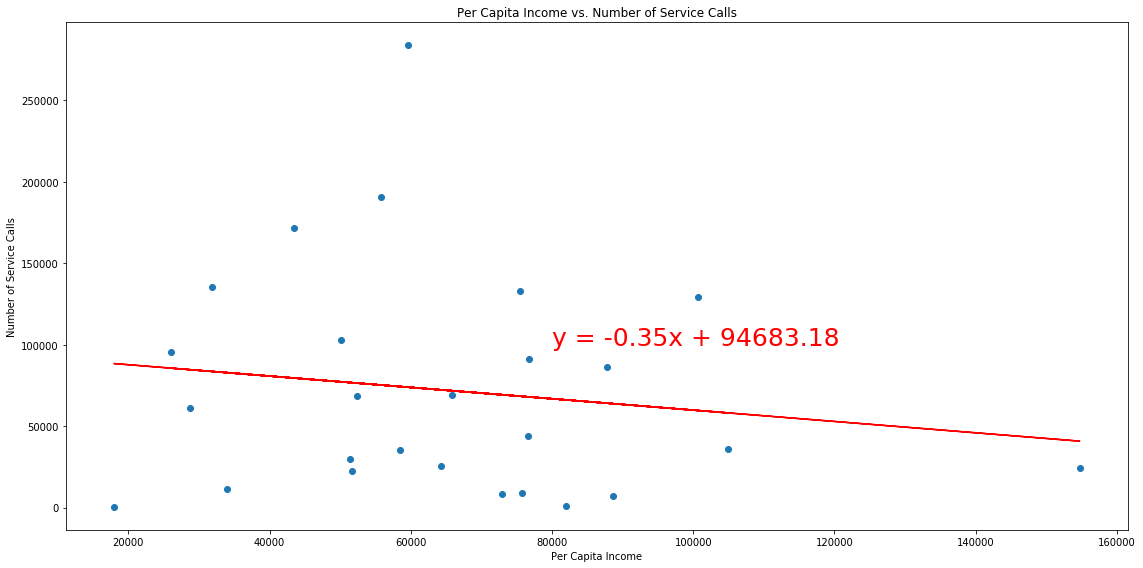

In [141]:
x_data = byzipcode_df['Per Capita Income']
y_data = byzipcode_df['Case Count']
plt.scatter(x_data, y_data)
plt.xlabel("Per Capita Income")
plt.ylabel("Number of Service Calls")
plt.title("Per Capita Income vs. Number of Service Calls")


correlation = st.pearsonr(x_data, y_data)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)

regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(80000,100000),fontsize=25,color="red")

print(f"The correlation between both factors is {correlation[0]}")
print(f"The correlation coefficient (rvalue) is {rvalue}")
print(f"The pvalue is {pvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.show()

In [126]:
byzipcode_df_5k_up = byzipcode_df[byzipcode_df['Population'] > 5000 ]
total_case_count_per_1k = byzipcode_df_5k_up['Case Count Per 1000 People'].sum()

byzipcode_df_5k_up['Request % per 1k'] = byzipcode_df_5k_up['Case Count Per 1000 People'] / total_case_count_per_1k

groupby_income_ranges = byzipcode_df_5k_up.groupby('Income Ranges')
income_range_percentage_per_1k = (groupby_income_ranges['Request % per 1k'].sum() * 100)
income_range_percentage_per_1k

d:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Income Ranges
<$35,000               12.248109
\$35,000-\$49,999      11.485628
\$50,000-\$74,999      41.151790
\$75,000-\$99,999      18.351992
\$100,000-\$150,000    10.418558
>$150,000               6.343923
Name: Request % per 1k, dtype: float64

In [127]:
byzipcode_df_5k_up

,Case Count,Household Income,Per Capita Income,Population,Case Count Per 1000 People,Neighborhood,Income Ranges,Request %,Request % per 1k
Zipcode,,,,,,,,,
94102,171629,33552,43488,30140,5694,Downtown / Union Square,"\$35,000-\$49,999",0.091592,0.114856
94103,190955,49052,55807,26990,7075,South of Market,"\$50,000-\$74,999",0.101906,0.142713
94105,24142,199364,154723,7675,3145,South Beach,">$150,000",0.012884,0.063439
94107,86295,143467,87735,29920,2884,Potrero Hill,"\$75,000-\$99,999",0.046052,0.058174
94108,30084,55341,51359,14856,2025,Chinatown,"\$50,000-\$74,999",0.016055,0.040847
94109,132828,79979,75460,56587,2347,Cathedral Hill,"\$75,000-\$99,999",0.070885,0.047342
94110,283725,109747,59660,73737,3847,Mission,"\$50,000-\$74,999",0.151413,0.077600
94112,135401,82692,31905,85373,1585,Sunnyside,"<$35,000",0.072258,0.031972
94114,129520,143902,100685,34561,3747,Mission Dolores,"\$100,000-\$150,000",0.069120,0.075582


Income Ranges
<$35,000               12.248109
\$35,000-\$49,999      11.485628
\$50,000-\$74,999      41.151790
\$75,000-\$99,999      18.351992
\$100,000-\$150,000    10.418558
>$150,000               6.343923
Name: Request % per 1k, dtype: float64

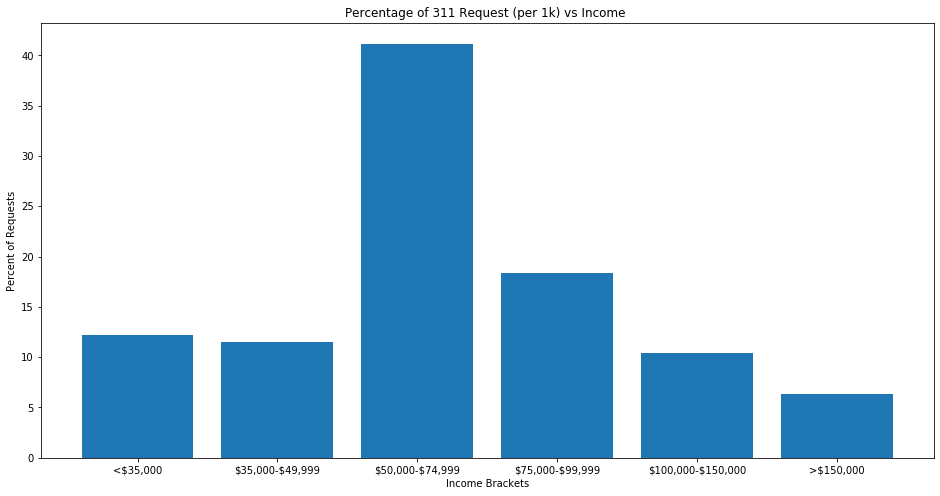

In [133]:
plt.bar(income_range_percentage_per_1k.index, income_range_percentage_per_1k.values)
plt.xlabel("Income Brackets")
plt.ylabel("Percent of Requests")
plt.title("Percentage of 311 Request (per 1k) vs Income ")
income_range_percentage_per_1k

The correlation between both factors is 0.07528314461044892
The correlation coefficient (rvalue) is 0.07528314461044891
The pvalue is 0.7391565495135637
The r-squared is: 0.0056675518624377625


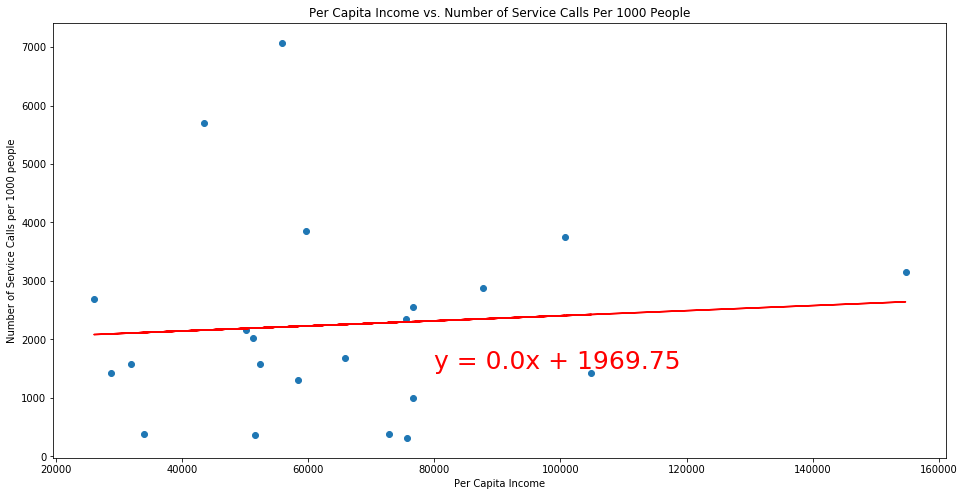

In [146]:
x_data = byzipcode_df_5k_up['Per Capita Income']
y_data = byzipcode_df_5k_up['Case Count Per 1000 People']
plt.scatter(x_data, y_data)
plt.xlabel("Per Capita Income")
plt.ylabel("Number of Service Calls per 1000 people")
plt.title("Per Capita Income vs. Number of Service Calls Per 1000 People")

correlation = st.pearsonr(x_data, y_data)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)

regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(80000,1500),fontsize=25,color="red")

print(f"The correlation between both factors is {correlation[0]}")
print(f"The correlation coefficient (rvalue) is {rvalue}")
print(f"The pvalue is {pvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.show()
